1. start tensorflow

In [3]:
import tensorflow as tf
#create a constant op
#this op is added as a node to the default graph
hello=tf.constant('Hello, TensorFlow!')
print(hello.numpy())

b'Hello, TensorFlow!'


In [4]:
#computational Graph
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0, tf.float32)
node3 = tf.add(node1, node2)

print("node1:",node1, "node2", node2)
print("node3:",node3)

print("node1:", node1.numpy(), "node2:", node2.numpy())
print("node3:", node3.numpy())

node1: tf.Tensor(3.0, shape=(), dtype=float32) node2 tf.Tensor(4.0, shape=(), dtype=float32)
node3: tf.Tensor(7.0, shape=(), dtype=float32)
node1: 3.0 node2: 4.0
node3: 7.0


In [5]:
"""#placeholder였는데... 이젠 안씀
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a+b

print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))"""

#즉시 실행
a = tf.constant(3.0, tf.float32)
b = tf.constant(4.5, tf.float32)
adder_node = a + b

print(adder_node.numpy())

a = tf.constant([1,3], tf.float32)
b = tf.constant([2,4], tf.float32)
adder_node = a + b
print(adder_node.numpy())


7.5
[3. 7.]


2. TensorFlow로 간단한 linear regresson 구현

In [6]:
#build graph: H(x)=Wx+b
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random.normal([1]), name='weight') #random한 값을 1차원으로 줌
b = tf.Variable(tf.random.normal([1]), name='bias')

#가설 함수 정의
def hypothesis(x):
    return x*W + b #our hypothesis XW+b

#cost/loss function
def loss_function(hypothesis, y):
    return tf.reduce_mean(tf.square(hypothesis-y_train)) #square: 제곱, reduce_mean: 평균

#gradient descent: minimize cost
optimizer = tf.optimizers.SGD(learning_rate=0.01)
#train = optimizer.minimize(cost) tensorflow 2.x에서는 minimize 사용안됨

# 학습
epochs = 2000
for step in range(epochs):
    # Gradient 계산 및 변수 업데이트
    with tf.GradientTape() as tape:
        current_loss = loss_function(hypothesis(x_train), y_train)
    gradients = tape.gradient(current_loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    # 로그 출력
    if step % 20 == 0:
        print(step, current_loss.numpy(), W.numpy(), b.numpy())


0 7.2993684 [-0.16863056] [0.13092566]
20 0.104035795 [0.68479824] [0.47603747]
40 0.035323355 [0.77564496] [0.4871126]
60 0.031544805 [0.79342854] [0.467405]
80 0.028644642 [0.803826] [0.44574198]
100 0.026015459 [0.8131111] [0.42482254]
120 0.023627654 [0.8219005] [0.4048602]
140 0.021459028 [0.8302711] [0.38583353]
160 0.019489428 [0.8382478] [0.3677008]
180 0.01770062 [0.8458495] [0.35042024]
200 0.016075984 [0.85309404] [0.33395174]
220 0.014600462 [0.85999805] [0.31825724]
240 0.01326039 [0.8665776] [0.30330032]
260 0.012043283 [0.87284803] [0.28904638]
280 0.010937899 [0.8788237] [0.27546227]
300 0.009933977 [0.88451856] [0.26251653]
320 0.009022205 [0.88994575] [0.2501792]
340 0.008194101 [0.8951179] [0.23842172]
360 0.0074420124 [0.90004694] [0.22721678]
380 0.006758956 [0.9047444] [0.21653843]
400 0.006138601 [0.90922105] [0.20636193]
420 0.0055751726 [0.9134873] [0.1966637]
440 0.005063464 [0.917553] [0.18742125]
460 0.004598717 [0.9214278] [0.17861313]
480 0.0041766376 [0.9

결과
정답: W=1, b=0
loss가 점점 줄어들고 W=1에, b=0에 수렴함

3. linear regresson의 cost 최소화의 TensorFlow 구현

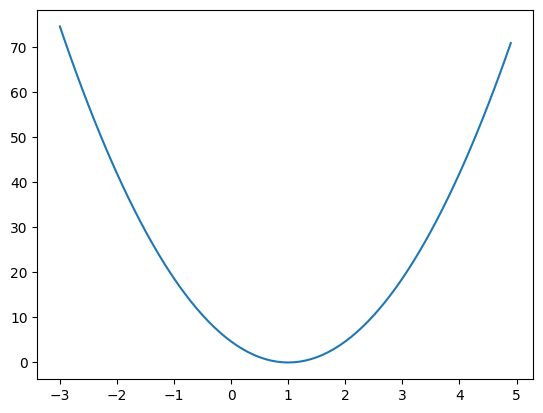

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1., 2., 3.], dtype=np.float32)
Y = np.array([1., 2., 3.], dtype=np.float32)

W = tf.Variable(0.)

@tf.function
def hypothesis(X):
    return X * W

def cost_func():
    return tf.reduce_mean(tf.square(hypothesis(X) - Y))

W_val = []
cost_val = []

for i in range(-30,50):
    W.assign(i*0.1) #W를 -3에서 5까지 움직임
    curr_cost = cost_func()
    W_val.append(W.numpy()) #현재 W값을 리스트에 추가
    cost_val.append(curr_cost.numpy()) #현재 비용함수 값 리스트에 추가

plt.plot(W_val, cost_val)
plt.show()


In [11]:
import tensorflow as tf
X = [1., 2., 3.]
Y = [1., 2., 3.]

W = tf.Variable(tf.random_normal([1]),name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X*W

cost = tf.reduce_sum(tf.square(hypothesis-Y))

#minimize: gradient descent using derivative: W-=learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W*X-Y)*X) #(W*X-Y)^2 미분 값
descent = W - learning_rate * gradient
update = W.assign(descent)
"""#minimize: Gradient Descent Maic
optimizer = tf.train.GradietDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)"""

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

In [19]:
#tensorflow 2.0
import tensorflow as tf

X = [1., 2., 3.]
Y = [1., 2., 3.]

W = tf.Variable(tf.random.normal([1]), name='weight')

learning_rate = 0.01

for step in range(1,21):
    with tf.GradientTape() as tape:
        hypothesis = W * X
        cost = tf.reduce_sum(tf.square(hypothesis - Y))
    W_grad = tape.gradient(cost, W) #gradient = tf.reduce_mean((W*X-Y)*X)에 해당: (W*X-Y)^2 미분 값
    W.assign_sub(learning_rate * W_grad)#descent = W - learning_rate * gradient에 해당
    print(step, cost.numpy(), W.numpy())


0 0.00044010626 5.0
1 224.0 3.88
2 116.121605 3.0736
3 60.19744 2.492992
4 31.206348 2.0749543
5 16.177376 1.773967
6 8.386351 1.5572562
7 4.347483 1.4012245
8 2.253735 1.2888817
9 1.1683364 1.2079948
10 0.6056657 1.1497563
11 0.31397724 1.1078246
12 0.16276592 1.0776337
13 0.08437791 1.0558963
14 0.04374152 1.0402453
15 0.022675574 1.0289766
16 0.011754995 1.020863
17 0.0060937395 1.0150214
18 0.0031590234 1.0108154
19 0.0016376148 1.0077871
20 0.0008489413 1.0056068


In [23]:
#초기 W를 5.0으로 설정
import tensorflow as tf

X = [1., 2., 3.]
Y = [1., 2., 3.]

W = tf.Variable(5.0)

optimizer = tf.optimizers.SGD(learning_rate=0.1) # SGD: Stochastic Gradient Descent

print(0, W.numpy())
for step in range(1,101):
    with tf.GradientTape() as tape:
        hypothesis = W * X
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    gradients = tape.gradient(cost, [W])
    optimizer.apply_gradients(zip(gradients, [W]))
    print(step, W.numpy())


0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
100 1.0


In [26]:
#직접 계산한 gradient와 optimizer로 계산한 gradient가 같은지 비교
import tensorflow as tf

X = [1., 2., 3.]
Y = [1., 2., 3.]

W = tf.Variable(5.)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

print(0, tf.reduce_mean((W * X - Y) * X).numpy(), W.numpy())
for step in range(1,101):
    with tf.GradientTape() as tape:
        hypothesis = W * X
        cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Get gradients
    W_grad = tape.gradient(cost, W)
    
    # Calculate gradient manually: 수동으로 gradient 계산
    gradient_manual = tf.reduce_mean((W * X - Y) * X) * 2

    # Update W using optimizer
    optimizer.apply_gradients(zip([W_grad], [W]))

    print(step, gradient_manual.numpy(), W.numpy(), W_grad.numpy())


0 18.666666 5.0
1 37.333332 1.2666664 37.333336
2 2.4888866 1.0177778 2.4888866
3 0.1659259 1.0011852 0.1659259
4 0.011061668 1.000079 0.011061668
5 0.00073742867 1.0000052 0.00073742867
6 4.895528e-05 1.0000004 4.8955284e-05
7 3.0994415e-06 1.0 3.0994415e-06
8 0.0 1.0 0.0
9 0.0 1.0 0.0
10 0.0 1.0 0.0
11 0.0 1.0 0.0
12 0.0 1.0 0.0
13 0.0 1.0 0.0
14 0.0 1.0 0.0
15 0.0 1.0 0.0
16 0.0 1.0 0.0
17 0.0 1.0 0.0
18 0.0 1.0 0.0
19 0.0 1.0 0.0
20 0.0 1.0 0.0
21 0.0 1.0 0.0
22 0.0 1.0 0.0
23 0.0 1.0 0.0
24 0.0 1.0 0.0
25 0.0 1.0 0.0
26 0.0 1.0 0.0
27 0.0 1.0 0.0
28 0.0 1.0 0.0
29 0.0 1.0 0.0
30 0.0 1.0 0.0
31 0.0 1.0 0.0
32 0.0 1.0 0.0
33 0.0 1.0 0.0
34 0.0 1.0 0.0
35 0.0 1.0 0.0
36 0.0 1.0 0.0
37 0.0 1.0 0.0
38 0.0 1.0 0.0
39 0.0 1.0 0.0
40 0.0 1.0 0.0
41 0.0 1.0 0.0
42 0.0 1.0 0.0
43 0.0 1.0 0.0
44 0.0 1.0 0.0
45 0.0 1.0 0.0
46 0.0 1.0 0.0
47 0.0 1.0 0.0
48 0.0 1.0 0.0
49 0.0 1.0 0.0
50 0.0 1.0 0.0
51 0.0 1.0 0.0
52 0.0 1.0 0.0
53 0.0 1.0 0.0
54 0.0 1.0 0.0
55 0.0 1.0 0.0
56 0.0 1.0 0.0
57 0.0 

4. multi-variable linear regression을 TensorFlow에서 구현하기

In [29]:
import tensorflow as tf
import numpy as np

x_data = np.array([[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]], dtype=np.float32)
y_data = np.array([[152.],
          [185.],
          [180.],
          [196.],
          [142.]], dtype=np.float32)

W = tf.Variable(tf.random.normal([3,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def run_optimization():
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(x_data,W) + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    gradients = tape.gradient(cost, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b]))
    return cost, hypothesis

for step in range(2001):
    cost_val, hy_val = run_optimization()
    if step % 10 == 0:
        print(step, "Cost: ", cost_val.numpy(), "\nPrediction:\n", hy_val.numpy())


0 Cost:  221075.38 
Prediction:
 [[-260.95798]
 [-319.91367]
 [-311.8621 ]
 [-341.88004]
 [-243.5665 ]]
10 Cost:  10.886541 
Prediction:
 [[154.95697]
 [180.00662]
 [180.7067 ]
 [194.51657]
 [137.75085]]
20 Cost:  8.817249 
Prediction:
 [[156.20403]
 [181.52695]
 [182.19351]
 [196.13722]
 [138.91455]]
30 Cost:  8.771856 
Prediction:
 [[156.19646]
 [181.53929]
 [182.1945 ]
 [196.13985]
 [138.92801]]
40 Cost:  8.726764 
Prediction:
 [[156.18515]
 [181.54706]
 [182.19102]
 [196.1376 ]
 [138.93797]]
50 Cost:  8.681923 
Prediction:
 [[156.17384]
 [181.55476]
 [182.18752]
 [196.13531]
 [138.94788]]
60 Cost:  8.637323 
Prediction:
 [[156.16258]
 [181.56248]
 [182.18404]
 [196.13306]
 [138.95775]]
70 Cost:  8.5929785 
Prediction:
 [[156.15135]
 [181.57014]
 [182.18056]
 [196.13081]
 [138.96762]]
80 Cost:  8.548809 
Prediction:
 [[156.14012]
 [181.5778 ]
 [182.17708]
 [196.12856]
 [138.97745]]
90 Cost:  8.50492 
Prediction:
 [[156.12894]
 [181.58545]
 [182.17363]
 [196.12631]
 [138.98724]]
100 

*리스트 indexing, slicing, iterating

In [32]:
a = np.array([[1,2,3,4,], [5,6,7,8], [9,10,11,12]])
#a[행: ,인덱스]
print(a[:,1])
print(a[-1])
print(a[-1, :])
print(a[-1, ...])
print(a[0:2 :])

[ 2  6 10]
[ 9 10 11 12]
[ 9 10 11 12]
[ 9 10 11 12]
[[1 2 3 4]
 [5 6 7 8]]
